Own Implementation (SSD)

In [12]:
import os

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

# Compute sum of square difference
def sum_squared_diff(first, second):
    first = np.array(first)
    second = np.array(second)
    squared_diff = (first - second) ** 2
    return np.sum(squared_diff)

# Compute index that yields min diff for row
def idx_min_sum_square_diff(pixels, tile, reference):
    start = math.floor(pixels/2)
    end = reference.shape[1] - math.floor(pixels/2) - 1
    diff = []
    for step in list(range(start, end)):
        diff.append(sum_squared_diff(tile,reference[:, step-math.floor(pixels/2):step+math.floor(pixels/2)]))
    return np.argmin(np.array(diff)) + start

# main program
INPUT_FOLDER = 'sample_images'
OUTPUT_FOLDER = 'output_images'
FILENAMES = os.listdir(INPUT_FOLDER)

# Sort the sequence of the file names
FILENAMES.sort()

# Create the output folder if it doesn't exist
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Set a global font size for plots
plt.rcParams.update({'font.size': 14})

suffix_match_l = "l.jpg"
suffix_match_r = "r.jpg"

processed_images = set()

blk_sizes = [3, 7, 11, 15]
num_disparities = [16, 32, 64, 255]
color_maps = ['gray', 'hot', 'rainbow', 'jet']

# Process each image in the folder
for filename in FILENAMES:
    if filename.endswith(suffix_match_l):
        # get standard filename
        std_filename = filename[:len(filename)-len(suffix_match_l)]

        # if not processed yet
        if not std_filename in processed_images:
            processed_images.add(std_filename)

            # Load the color image
            input_path_l = os.path.join(INPUT_FOLDER, filename)
            l_image = cv2.imread(input_path_l, cv2.IMREAD_GRAYSCALE)
            input_path_r = os.path.join(INPUT_FOLDER, std_filename + suffix_match_r)
            r_image = cv2.imread(input_path_r, cv2.IMREAD_GRAYSCALE)

            for pixels in blk_sizes:
              start_y = math.floor(pixels/2)
              end_y = l_image.shape[0] - math.floor(pixels/2) - 1

              start_x = start_y
              end_x = l_image.shape[1] - math.floor(pixels/2) - 1

              d_map = np.zeros(l_image.shape)

              for step_y in list(range(start_y, end_y)):
                  if step_y%10==0:
                      print('Current image: ', std_filename, ', Current step_y: ', step_y)
                  for step_x in list(range(start_x, end_x)):
                      tile = l_image[step_y-math.floor(pixels/2):step_y+math.floor(pixels/2),step_x-math.floor(pixels/2):step_x+math.floor(pixels/2)]
                      h_stripe = r_image[step_y-math.floor(pixels/2):step_y+math.floor(pixels/2),:]
                      best_x = idx_min_sum_square_diff(pixels, tile, h_stripe)
                      d_map[step_y, step_x] = abs(best_x-step_x)

              for color_map in color_maps:
                  for num_disparity in num_disparities:
                      print(f'blk_size: {pixels}, num_disparity: {num_disparity}, color_map: {color_map}')
                      d_map_tmp = np.uint8(d_map * 255 / num_disparity)
                      plt.imshow(d_map_tmp, cmap=color_map, interpolation='nearest')
                      plt.show()

Output hidden; open in https://colab.research.google.com to view.

Own Implementation (SAD)

In [13]:
import os

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

# Compute sum of absolute difference
def sum_absolute_diff(first, second):
    return np.sum(abs(first - second))

# Compute index that yields min diff for row
def idx_min_sum_square_diff(pixels, tile, reference):
    start = math.floor(pixels/2)
    end = reference.shape[1] - math.floor(pixels/2) - 1
    diff = []
    for step in list(range(start, end)):
        diff.append(sum_absolute_diff(tile,reference[:, step-math.floor(pixels/2):step+math.floor(pixels/2)]))
    return np.argmin(np.array(diff)) + start

# main program
INPUT_FOLDER = 'sample_images'
OUTPUT_FOLDER = 'output_images'
FILENAMES = os.listdir(INPUT_FOLDER)

# Sort the sequence of the file names
FILENAMES.sort()

# Create the output folder if it doesn't exist
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Set a global font size for plots
plt.rcParams.update({'font.size': 14})

suffix_match_l = "l.jpg"
suffix_match_r = "r.jpg"

processed_images = set()

blk_sizes = [3, 7, 11, 15]
num_disparities = [16, 32, 64, 255]
color_maps = ['gray', 'hot', 'rainbow', 'jet']

# Process each image in the folder
for filename in FILENAMES:
    if filename.endswith(suffix_match_l):
        # get standard filename
        std_filename = filename[:len(filename)-len(suffix_match_l)]

        # if not processed yet
        if not std_filename in processed_images:
            processed_images.add(std_filename)

            # Load the color image
            input_path_l = os.path.join(INPUT_FOLDER, filename)
            l_image = cv2.imread(input_path_l, cv2.IMREAD_GRAYSCALE)
            input_path_r = os.path.join(INPUT_FOLDER, std_filename + suffix_match_r)
            r_image = cv2.imread(input_path_r, cv2.IMREAD_GRAYSCALE)

            for pixels in blk_sizes:
              start_y = math.floor(pixels/2)
              end_y = l_image.shape[0] - math.floor(pixels/2) - 1

              start_x = start_y
              end_x = l_image.shape[1] - math.floor(pixels/2) - 1

              d_map = np.zeros(l_image.shape)

              for step_y in list(range(start_y, end_y)):
                  if step_y%10==0:
                      print('Current image: ', std_filename, ', Current step_y: ', step_y)
                  for step_x in list(range(start_x, end_x)):
                      tile = l_image[step_y-math.floor(pixels/2):step_y+math.floor(pixels/2),step_x-math.floor(pixels/2):step_x+math.floor(pixels/2)]
                      h_stripe = r_image[step_y-math.floor(pixels/2):step_y+math.floor(pixels/2),:]
                      best_x = idx_min_sum_square_diff(pixels, tile, h_stripe)
                      d_map[step_y, step_x] = abs(best_x-step_x)

              for color_map in color_maps:
                  for num_disparity in num_disparities:
                      print(f'blk_size: {pixels}, num_disparity: {num_disparity}, color_map: {color_map}')
                      d_map_tmp = np.uint8(d_map * 255 / num_disparity)
                      plt.imshow(d_map_tmp, cmap=color_map, interpolation='nearest')
                      plt.show()

Output hidden; open in https://colab.research.google.com to view.

Using OpenCV directly
https://docs.opencv.org/4.x/dd/d53/tutorial_py_depthmap.html

In [14]:
import os

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

# main program
INPUT_FOLDER = 'sample_images'
OUTPUT_FOLDER = 'output_images'
FILENAMES = os.listdir(INPUT_FOLDER)

# Sort the sequence of the file names
FILENAMES.sort()

# Create the output folder if it doesn't exist
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Set a global font size for plots
plt.rcParams.update({'font.size': 14})

suffix_match_l = "l.jpg"
suffix_match_r = "r.jpg"

processed_images = set()

blk_sizes = [7, 11, 15]
num_disparities = [16, 32, 64]
color_maps = ['gray', 'hot', 'rainbow', 'jet']

# Process each image in the folder
for filename in FILENAMES:
    if filename.endswith(suffix_match_l):
        # get standard filename
        std_filename = filename[:len(filename)-len(suffix_match_l)]

        # if not processed yet
        if not std_filename in processed_images:
            processed_images.add(std_filename)

            for pixels in blk_sizes:
                for color_map in color_maps:
                    for num_disparity in num_disparities:
            # Load the color image
                      input_path_l = os.path.join(INPUT_FOLDER, filename)
                      l_image = cv2.imread(input_path_l, cv2.IMREAD_GRAYSCALE)
                      input_path_r = os.path.join(INPUT_FOLDER, std_filename + suffix_match_r)
                      r_image = cv2.imread(input_path_r, cv2.IMREAD_GRAYSCALE)

                      stereo = cv2.StereoBM.create(numDisparities=num_disparity, blockSize=pixels)
                      disparity = stereo.compute(l_image, r_image)
                      print(f'blk_size: {pixels}, num_disparity: {num_disparity}, color_map: {color_map}')
                      plt.imshow(disparity, color_map)
                      plt.show()

Output hidden; open in https://colab.research.google.com to view.

Other online resources
https://pramod-atre.medium.com/disparity-map-computation-in-python-and-c-c8113c63d701
https://github.com/pramodatre/cv-algorithms/blob/master/stereo_vision/stereo_vision.py

(256, 256)
(256, 256)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


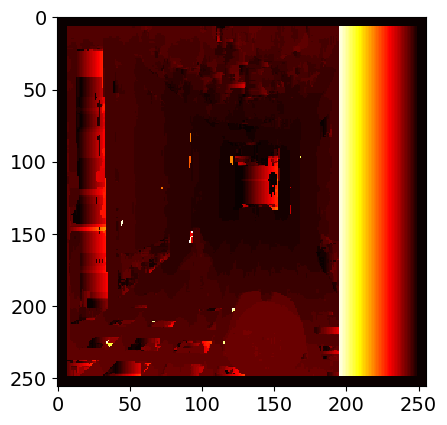

In [15]:
"""
MIT License

Copyright (c) 2020 Pramod Anantharam

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

"""
Implementation using ideas from:
http://mccormickml.com/2014/01/10/stereo-vision-tutorial-part-i/

"""
BLOCK_SIZE = 7
SEARCH_BLOCK_SIZE = 56

def _read_left_right_image_pair(left_image_path="sample_images/corridorl.jpg",
                                right_image_path="sample_images/corridorr.jpg"):
    # left_im = Image.open(left_image_path).convert('L')
    # right_im = Image.open(right_image_path).convert('L')
    # Load an color image in grayscale
    left_im = cv2.imread(left_image_path, 0)
    right_im = cv2.imread(right_image_path, 0)
    #display_image(left_im, 'left_im')
    #display_image(right_im, 'right_im')
    # Convert image to array
    left_im_array = np.asarray(left_im)
    right_im_array = np.asarray(right_im)
    print(left_im_array.shape)
    print(right_im_array.shape)

    return left_im_array, right_im_array


def display_image(img, window_name='img'):
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def sum_of_abs_diff(pixel_vals_1, pixel_vals_2):
    """

    Args:
        pixel_vals_1 (numpy.ndarray): pixel block from left image
        pixel_vals_2 (numpy.ndarray): pixel block from right image

    Returns:
        float: Sum of absolute difference between individual pixels
    """
    if pixel_vals_1.shape != pixel_vals_2.shape:
        return -1

    return np.sum(abs(pixel_vals_1 - pixel_vals_2))


def compare_blocks(y, x, block_left, right_array, block_size=5):
    """
    Compare left block of pixels with multiple blocks from the right
    image using SEARCH_BLOCK_SIZE to constrain the search in the right
    image.

    Args:
        y (int): row index of the left block
        x (int): column index of the left block
        block_left (numpy.ndarray): containing pixel values within the
                    block selected from the left image
        right_array (numpy.ndarray]): containing pixel values for the
                     entrire right image
        block_size (int, optional): Block of pixels width and height.
                                    Defaults to 5.

    Returns:
        tuple: (y, x) row and column index of the best matching block
                in the right image
    """
    # Get search range for the right image
    x_min = max(0, x - SEARCH_BLOCK_SIZE)
    x_max = min(right_array.shape[1], x + SEARCH_BLOCK_SIZE)
    #print(f'search bounding box: ({y, x_min}, ({y, x_max}))')
    first = True
    min_sad = None
    min_index = None
    for x in range(x_min, x_max):
        block_right = right_array[y: y+block_size,
                                  x: x+block_size]
        sad = sum_of_abs_diff(block_left, block_right)
        #print(f'sad: {sad}, {y, x}')
        if first:
            min_sad = sad
            min_index = (y, x)
            first = False
        else:
            if sad < min_sad:
                min_sad = sad
                min_index = (y, x)

    return min_index


def right_image_block(x, y):
    left_array, right_array = _read_left_right_image_pair()
    right_im = cv2.imread("data/right.png", 0)
    x_min = max(0, x - 50)
    x_max = min(right_array.shape[1], x + 25)
    right_im_bbox = cv2.rectangle(right_im, (x_min, y),
                                  (x_max, y + 25),
                                  (0, 0, 255), 2)
    display_image(right_im_bbox, window_name='right')


def get_disparity_map():
    left_array, right_array = _read_left_right_image_pair()
    left_array = left_array.astype(int)
    right_array = right_array.astype(int)
    if left_array.shape != right_array.shape:
        raise "Left-Right image shape mismatch!"
    h, w = left_array.shape
    # left_im = cv2.imread("data/left.png", 0)
    disparity_map = np.zeros((h, w))
    # Go over each pixel position
    for y in range(BLOCK_SIZE, h-BLOCK_SIZE):
        for x in range(BLOCK_SIZE, w-BLOCK_SIZE):
            block_left = left_array[y:y + BLOCK_SIZE,
                                    x:x + BLOCK_SIZE]
            min_index = compare_blocks(y, x, block_left,
                                       right_array,
                                       block_size=BLOCK_SIZE)
            disparity_map[y, x] = abs(min_index[1] - x)
            # Debug section to visualize the blocks on the image
            # left_im_bbox = cv2.rectangle(left_im, (x, y),
            #                              (x + 25, y + 25),
            #                              (0, 0, 255), 2)
            # display_image(left_im_bbox, window_name='left')
            # print(left_array[y:y+25, x:x+25])
            # right_image_block(x, y)

    print(disparity_map)
    plt.imshow(disparity_map, cmap='hot', interpolation='nearest')
    plt.savefig('depth_image.png')
    plt.show()
    # img = Image.fromarray(disparity_map, 'L')
    # img.show()


if __name__ == '__main__':
    get_disparity_map()